## Plot pie charts of moonquake categories

### Import libraries

In [1]:
import glob
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
import os
import math
from matplotlib import gridspec

### Plot pie chart of Grade A through D moonquakes

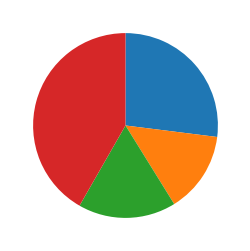

In [2]:
# Number in each category
mqdir1 = '../catalogs/FC_catalogs/'
fullcat = pd.read_csv(mqdir1 + 'GradeABCD_combined_catalog.csv')
cat_A = fullcat.loc[fullcat.grade == 'A']
nums_A = len(np.unique(cat_A.evid.tolist()))
cat_B = fullcat.loc[fullcat.grade == 'B']
nums_B = len(np.unique(cat_B.evid.tolist()))
cat_C = fullcat.loc[fullcat.grade == 'C']
nums_C = len(np.unique(cat_C.evid.tolist()))
cat_D = fullcat.loc[fullcat.grade == 'D']
nums_D = len(np.unique(cat_D.evid.tolist()))
mq_nums = [nums_A, nums_B, nums_C, nums_D]

# Plot
fig,ax = plt.subplots(1,1,figsize=(3, 3))
patches,texts = ax.pie(mq_nums, startangle = 90, counterclock=False)

### Plot high quality vs. low quality detections

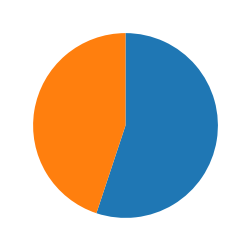

In [3]:
# Load numbers
mqdir2 = '../catalogs/quality_control/'
cat = pd.read_csv(mqdir2 + 'A17_moonquakes_catalog_nodupes.csv')
num_hq = len(cat.loc[cat.quality == 'HQ'])
num_lq = len(cat.loc[cat.quality == 'LQ'])
mq_nums = [num_hq, num_lq]

# Plot pie chart
fig,ax = plt.subplots(1,1,figsize=(3, 3))
patches,texts = ax.pie(mq_nums, startangle = 90, counterclock=False)

In [4]:
mq_nums

[25675, 20923]

### Plot distribution of Grade AA, BB, CC, DD, and EE events

Text(0.5, 0.92, 'All moonquakes')

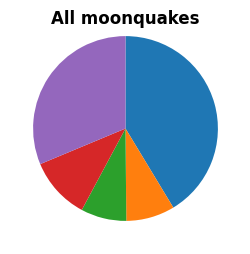

In [5]:
# Get number of each category
aa_cat = cat.loc[cat.grade_new == 'AA']
num_aa = len(np.unique(aa_cat.evid.tolist()))
bb_cat = cat.loc[cat.grade_new == 'BB']
num_bb = len(np.unique(bb_cat.evid.tolist()))
cc_cat = cat.loc[cat.grade_new == 'CC']
num_cc = len(np.unique(cc_cat.evid.tolist()))
dd_cat = cat.loc[cat.grade_new == 'DD']
num_dd = len(np.unique(dd_cat.evid.tolist()))
ee_cat = cat.loc[cat.grade_new == 'EE']
num_ee = len(np.unique(ee_cat.evid.tolist()))
mq_nums = [num_aa, num_bb, num_cc, num_dd, num_ee]

# Plot pie chart
fig,ax = plt.subplots(1,1,figsize=(3, 3))
patches,texts = ax.pie(mq_nums, startangle = 90, counterclock=False)
ax.set_title('All moonquakes',fontweight='bold',y=0.92, fontsize=12)

In [6]:
mq_nums

[4875, 1004, 941, 1281, 3690]

### Plot isolated vs. repeating

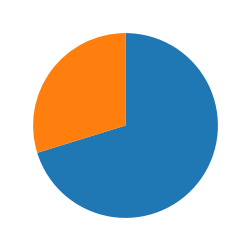

In [7]:
# Combined catalog
mqdir3 = '../catalogs/final_catalogs/'
cat = pd.read_csv(mqdir3 + 'A17_moonquakes_catalog_HQ_final.csv')

# Isolated
isolated_cat = cat.loc[cat.isol_or_rpt == 'isolated']
evids_isolated = np.unique(isolated_cat.evid.tolist())

# Repeating
repeating_cat = cat.loc[cat.isol_or_rpt == 'repeating']
evids_repeating = np.unique(repeating_cat.evid.tolist())

# Plot pie chart
fig,ax = plt.subplots(1,1,figsize=(3, 3))
mq_nums = [len(evids_isolated), len(evids_repeating)]
patches,texts = ax.pie(mq_nums, startangle = 90, counterclock=False)

In [8]:
len(evids_repeating)

2412

In [9]:
len(evids_isolated)

5689

### Plot pie charts of high vs low quality waveforms of repeating and isolated events

#### Repeating

Text(0.5, 0.92, 'Repeating')

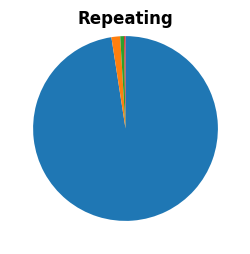

In [10]:
# Get number of each category
combined_cat = pd.read_csv(mqdir3 + 'A17_moonquakes_catalog_HQ_final.csv')
repeating_cat = combined_cat.loc[combined_cat.isol_or_rpt == 'repeating']
aa_cat = repeating_cat.loc[repeating_cat.grade_new == 'AA']
num_aa = len(np.unique(aa_cat.evid.tolist()))
bb_cat = repeating_cat.loc[repeating_cat.grade_new == 'BB']
num_bb = len(np.unique(bb_cat.evid.tolist()))
cc_cat = repeating_cat.loc[repeating_cat.grade_new == 'CC']
num_cc = len(np.unique(cc_cat.evid.tolist()))
dd_cat = repeating_cat.loc[repeating_cat.grade_new == 'DD']
num_dd = len(np.unique(dd_cat.evid.tolist()))
mq_nums = [num_aa, num_bb, num_cc, num_dd]

# Plot pie chart
fig,ax = plt.subplots(1,1,figsize=(3, 3))
patches,texts = ax.pie(mq_nums, startangle = 90, counterclock=False)
ax.set_title('Repeating',fontweight='bold',y=0.92, fontsize=12)

In [11]:
mq_nums

[2353, 37, 16, 6]

#### Isolated

Text(0.5, 0.92, 'Isolated')

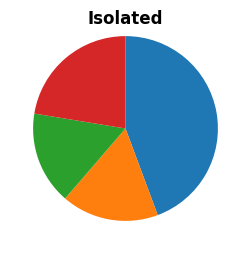

In [12]:
# Get number of each category
isolated_cat = combined_cat.loc[combined_cat.isol_or_rpt == 'isolated']
aa_cat = isolated_cat.loc[isolated_cat.grade_new == 'AA']
num_aa = len(np.unique(aa_cat.evid.tolist()))
bb_cat = isolated_cat.loc[isolated_cat.grade_new == 'BB']
num_bb = len(np.unique(bb_cat.evid.tolist()))
cc_cat = isolated_cat.loc[isolated_cat.grade_new == 'CC']
num_cc = len(np.unique(cc_cat.evid.tolist()))
dd_cat = isolated_cat.loc[isolated_cat.grade_new == 'DD']
num_dd = len(np.unique(dd_cat.evid.tolist()))
mq_nums = [num_aa, num_bb, num_cc, num_dd]

# Plot pie chart
fig,ax = plt.subplots(1,1,figsize=(3, 3))
patches,texts = ax.pie(mq_nums, startangle = 90, counterclock=False)
ax.set_title('Isolated',fontweight='bold',y=0.92, fontsize=12)

In [13]:
mq_nums

[2522, 967, 925, 1275]

### Plot distribution of # of moonquakes per family

In [14]:
evid_refs = np.unique(repeating_cat.evid_ref.tolist())

# Keep track of number of moonquakes per family
mq_nums = []
mq_types = []

# Iterate through each family
num_few = 0
for evid in evid_refs:
    
    # Count # of moonquakes in family
    mqrows = repeating_cat.loc[repeating_cat.evid_ref == evid]
    nummqs = len(np.unique(mqrows.evid.tolist()))
    # If family has 5 or fewer moonquakes
    if nummqs <= 5:
        num_few += nummqs
    else:
        mq_nums.append(nummqs)
        mq_types.append(evid)
    
# Sort by # of moonquakes
d = {'mq_nums': mq_nums, 'mq_types': mq_types}
mqnum_tbl = pd.DataFrame(data=d)
mqnum_tbl = mqnum_tbl.sort_values(by=['mq_nums'], ascending = False)
mq_nums = mqnum_tbl.mq_nums.tolist()
mq_types = mqnum_tbl.mq_types.tolist()
mq_types.append('<5 MQs')
mq_nums.append(num_few)

In [15]:
len(evid_refs)

347

Text(0.5, 0.92, 'Family Sizes')

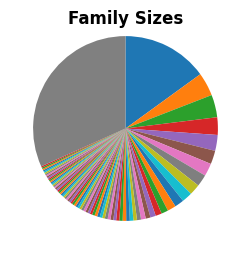

In [16]:
fig,ax = plt.subplots(1,1,figsize=(3, 3))
patches,texts = ax.pie(mq_nums, startangle = 90, counterclock=False)
(patches[-1]).set_facecolor('grey')
ax.set_title('Family Sizes',fontsize=12,fontweight='bold',y=0.92)

### Obtain # LM, boulder, and other thermal moonquakes

In [17]:
# LM
mqdir4 = '../catalogs/final_catalogs/LM_vs_boulder_vs_other/'
cat_LM = pd.read_csv(mqdir4 + 'A17_LM_catalog_HQ_avg_event_stats.csv')
num_LM = len(np.unique(cat_LM.evid.tolist()))
num_LM_rpt = len(np.unique(cat_LM.loc[cat_LM.isol_or_rpt == 'repeating'].evid.tolist()))
num_LM_isol = len(np.unique(cat_LM.loc[cat_LM.isol_or_rpt == 'isolated'].evid.tolist()))

# Combine boulder-quake catalogs
cat_georock = pd.read_csv(mqdir4 + 'GeophoneRock_events_catalog_HQ_avg_event_stats.csv')
cat_R2 = pd.read_csv(mqdir4 + 'R2Rock_events_catalog_HQ_avg_event_stats.csv')
cat_rock1 = pd.read_csv(mqdir4 + 'GEO4Rock1_events_catalog_HQ_avg_event_stats.csv')
cat_rock23 = pd.read_csv(mqdir4 + 'GEO4Rock2or3_events_catalog_HQ_avg_event_stats.csv')
cat_boulders = pd.concat([cat_georock, cat_R2, cat_rock1, cat_rock23])
# Repeating
num_boulders = len(np.unique(cat_boulders.evid.tolist()))
num_boulders_rpt = len(np.unique(cat_boulders.loc[cat_boulders.isol_or_rpt == 'repeating'].evid.tolist()))
num_boulders_isol = len(np.unique(cat_boulders.loc[cat_boulders.isol_or_rpt == 'isolated'].evid.tolist()))

# Other thermal moonquakes 
cat_other = pd.read_csv(mqdir4 + 'A17_other_catalog_HQ_avg_event_stats.csv')
num_other = len(np.unique(cat_other.evid.tolist()))
num_other_rpt = len(np.unique(cat_other.loc[cat_other.isol_or_rpt == 'repeating'].evid.tolist()))
num_other_isol = len(np.unique(cat_other.loc[cat_other.isol_or_rpt == 'isolated'].evid.tolist()))

# Compile
nums_all = [num_LM, num_boulders, num_other]
nums_repeating = [num_LM_rpt, num_boulders_rpt, num_other_rpt]
nums_isolated = [num_LM_isol, num_boulders_isol, num_other_isol]

### Plot pie charts of category distributions

#### All

Text(0.5, 0.92, 'Moonquake categories')

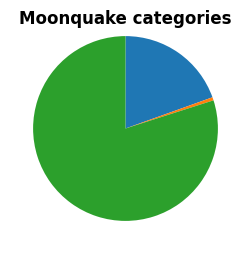

In [18]:
fig,ax = plt.subplots(1,1,figsize=(3, 3))
patches,texts = ax.pie(nums_all, startangle = 90, counterclock=False)
ax.set_title('Moonquake categories',fontweight='bold',y=0.92, fontsize=12)

In [19]:
nums_all

[1581, 45, 6475]

#### Repeating

Text(0.5, 0.92, 'Repeating moonquake categories')

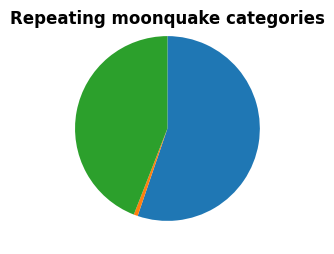

In [20]:
fig,ax = plt.subplots(1,1,figsize=(3, 3))
patches,texts = ax.pie(nums_repeating, startangle = 90, counterclock=False)
ax.set_title('Repeating moonquake categories',fontweight='bold',y=0.92, fontsize=12)

In [21]:
nums_repeating

[1332, 17, 1063]

#### Isolated

Text(0.5, 0.92, 'Isolated moonquake categories')

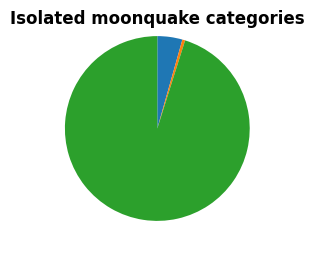

In [22]:
fig,ax = plt.subplots(1,1,figsize=(3, 3))
patches,texts = ax.pie(nums_isolated, startangle = 90, counterclock=False)
ax.set_title('Isolated moonquake categories',fontweight='bold',y=0.92, fontsize=12)

In [23]:
nums_isolated

[249, 28, 5412]

In [24]:
np.sum(nums_isolated)

5689

### Distribution of event grades among LM events

In [25]:
# All
num_AA_LM = len(cat_LM.loc[cat_LM.grade_new == 'AA'])
num_BB_LM = len(cat_LM.loc[cat_LM.grade_new == 'BB'])
num_CC_LM = len(cat_LM.loc[cat_LM.grade_new == 'CC'])
num_DD_LM = len(cat_LM.loc[cat_LM.grade_new == 'DD'])
num_EE_LM = len(cat_LM.loc[cat_LM.grade_new == 'EE'])
nums_LM = [num_AA_LM, num_BB_LM, num_CC_LM, num_DD_LM, num_EE_LM]

# Repeating
num_AA_LM_rpt = len(cat_LM.loc[(cat_LM.grade_new == 'AA') & (cat_LM.isol_or_rpt == 'repeating')])
num_BB_LM_rpt = len(cat_LM.loc[(cat_LM.grade_new == 'BB') & (cat_LM.isol_or_rpt == 'repeating')])
num_CC_LM_rpt = len(cat_LM.loc[(cat_LM.grade_new == 'CC') & (cat_LM.isol_or_rpt == 'repeating')])
num_DD_LM_rpt = len(cat_LM.loc[(cat_LM.grade_new == 'DD') & (cat_LM.isol_or_rpt == 'repeating')])
num_EE_LM_rpt = len(cat_LM.loc[(cat_LM.grade_new == 'EE') & (cat_LM.isol_or_rpt == 'repeating')])
nums_LM_rpt = [num_AA_LM_rpt, num_BB_LM_rpt, num_CC_LM_rpt, num_DD_LM_rpt, num_EE_LM_rpt]

# Isolated
num_AA_LM_isol = len(cat_LM.loc[(cat_LM.grade_new == 'AA') & (cat_LM.isol_or_rpt == 'isolated')])
num_BB_LM_isol = len(cat_LM.loc[(cat_LM.grade_new == 'BB') & (cat_LM.isol_or_rpt == 'isolated')])
num_CC_LM_isol = len(cat_LM.loc[(cat_LM.grade_new == 'CC') & (cat_LM.isol_or_rpt == 'isolated')])
num_DD_LM_isol = len(cat_LM.loc[(cat_LM.grade_new == 'DD') & (cat_LM.isol_or_rpt == 'isolated')])
num_EE_LM_isol = len(cat_LM.loc[(cat_LM.grade_new == 'EE') & (cat_LM.isol_or_rpt == 'isolated')])
nums_LM_isol = [num_AA_LM_isol, num_BB_LM_isol, num_CC_LM_isol, num_DD_LM_isol, num_EE_LM_isol]

#### All

Text(0.5, 0.92, 'LM Event Grades')

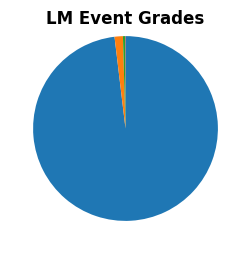

In [26]:
fig,ax = plt.subplots(1,1,figsize=(3, 3))
patches,texts = ax.pie(nums_LM, startangle = 90, counterclock=False)
ax.set_title('LM Event Grades',fontweight='bold',y=0.92, fontsize=12)

In [27]:
nums_LM

[1551, 23, 6, 1, 0]

#### Repeating

Text(0.5, 0.92, 'Repeating LM Event Grades')

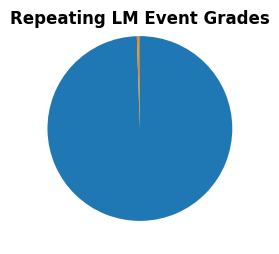

In [28]:
fig,ax = plt.subplots(1,1,figsize=(3, 3))
patches,texts = ax.pie(nums_LM_rpt, startangle = 90, counterclock=False)
ax.set_title('Repeating LM Event Grades',fontweight='bold',y=0.92, fontsize=12)

In [29]:
nums_LM_rpt

[1325, 4, 2, 1, 0]

#### Isolated

Text(0.5, 0.92, 'Isolated LM Event Grades')

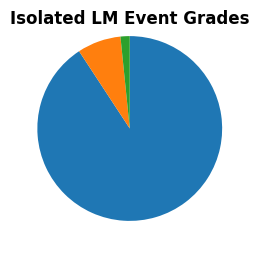

In [30]:
fig,ax = plt.subplots(1,1,figsize=(3, 3))
patches,texts = ax.pie(nums_LM_isol, startangle = 90, counterclock=False)
ax.set_title('Isolated LM Event Grades',fontweight='bold',y=0.92, fontsize=12)

In [31]:
nums_LM_isol

[226, 19, 4, 0, 0]

### Distribution of event grades among boulder-quakes

In [32]:
# All
num_AA_boulders = len(cat_boulders.loc[cat_boulders.grade_new == 'AA'])
num_BB_boulders = len(cat_boulders.loc[cat_boulders.grade_new == 'BB'])
num_CC_boulders = len(cat_boulders.loc[cat_boulders.grade_new == 'CC'])
num_DD_boulders = len(cat_boulders.loc[cat_boulders.grade_new == 'DD'])
num_EE_boulders = len(cat_boulders.loc[cat_boulders.grade_new == 'EE'])
nums_boulders = [num_AA_boulders, num_BB_boulders, num_CC_boulders, num_DD_boulders, num_EE_boulders]

# Repeating
num_AA_boulders_rpt = len(cat_boulders.loc[(cat_boulders.grade_new == 'AA') & (cat_boulders.isol_or_rpt == 'repeating')])
num_BB_boulders_rpt = len(cat_boulders.loc[(cat_boulders.grade_new == 'BB') & (cat_boulders.isol_or_rpt == 'repeating')])
num_CC_boulders_rpt = len(cat_boulders.loc[(cat_boulders.grade_new == 'CC') & (cat_boulders.isol_or_rpt == 'repeating')])
num_DD_boulders_rpt = len(cat_boulders.loc[(cat_boulders.grade_new == 'DD') & (cat_boulders.isol_or_rpt == 'repeating')])
num_EE_boulders_rpt = len(cat_boulders.loc[(cat_boulders.grade_new == 'EE') & (cat_boulders.isol_or_rpt == 'repeating')])
nums_boulders_rpt = [num_AA_boulders_rpt, num_BB_boulders_rpt, num_CC_boulders_rpt, num_DD_boulders_rpt, num_EE_boulders_rpt]

# Isolated
num_AA_boulders_isol = len(cat_boulders.loc[(cat_boulders.grade_new == 'AA') & (cat_boulders.isol_or_rpt == 'isolated')])
num_BB_boulders_isol = len(cat_boulders.loc[(cat_boulders.grade_new == 'BB') & (cat_boulders.isol_or_rpt == 'isolated')])
num_CC_boulders_isol = len(cat_boulders.loc[(cat_boulders.grade_new == 'CC') & (cat_boulders.isol_or_rpt == 'isolated')])
num_DD_boulders_isol = len(cat_boulders.loc[(cat_boulders.grade_new == 'DD') & (cat_boulders.isol_or_rpt == 'isolated')])
num_EE_boulders_isol = len(cat_boulders.loc[(cat_boulders.grade_new == 'EE') & (cat_boulders.isol_or_rpt == 'isolated')])
nums_boulders_isol = [num_AA_boulders_isol, num_BB_boulders_isol, num_CC_boulders_isol, num_DD_boulders_isol, num_EE_boulders_isol]

#### All

Text(0.5, 0.92, 'Boulder-quake Grades')

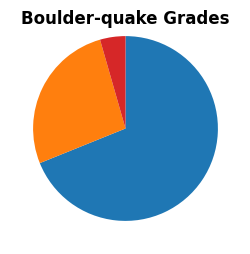

In [33]:
fig,ax = plt.subplots(1,1,figsize=(3, 3))
patches,texts = ax.pie(nums_boulders, startangle = 90, counterclock=False)
ax.set_title('Boulder-quake Grades',fontweight='bold',y=0.92, fontsize=12)

In [34]:
nums_boulders

[31, 12, 0, 2, 0]

#### Repeating

Text(0.5, 0.92, 'Repeating Boulder-quake Grades')

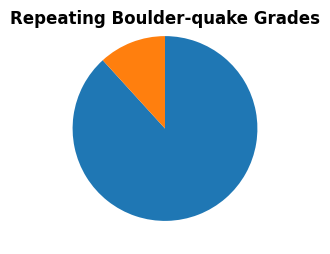

In [35]:
fig,ax = plt.subplots(1,1,figsize=(3, 3))
patches,texts = ax.pie(nums_boulders_rpt, startangle = 90, counterclock=False)
ax.set_title('Repeating Boulder-quake Grades',fontweight='bold',y=0.92, fontsize=12)

In [36]:
nums_boulders_rpt

[15, 2, 0, 0, 0]

#### Isolated

Text(0.5, 0.92, 'Isolated Boulder-quake Grades')

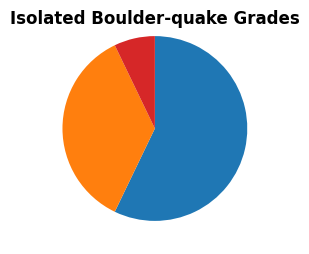

In [37]:
fig,ax = plt.subplots(1,1,figsize=(3, 3))
patches,texts = ax.pie(nums_boulders_isol, startangle = 90, counterclock=False)
ax.set_title('Isolated Boulder-quake Grades',fontweight='bold',y=0.92, fontsize=12)

In [38]:
nums_boulders_isol

[16, 10, 0, 2, 0]

### Distribution of event grades among other thermal moonquakes

In [39]:
# All
num_AA_other = len(cat_other.loc[cat_other.grade_new == 'AA'])
num_BB_other = len(cat_other.loc[cat_other.grade_new == 'BB'])
num_CC_other = len(cat_other.loc[cat_other.grade_new == 'CC'])
num_DD_other = len(cat_other.loc[cat_other.grade_new == 'DD'])
num_EE_other = len(cat_other.loc[cat_other.grade_new == 'EE'])
nums_other = [num_AA_other, num_BB_other, num_CC_other, num_DD_other, num_EE_other]

# Repeating
num_AA_other_rpt = len(cat_other.loc[(cat_other.grade_new == 'AA') & (cat_other.isol_or_rpt == 'repeating')])
num_BB_other_rpt = len(cat_other.loc[(cat_other.grade_new == 'BB') & (cat_other.isol_or_rpt == 'repeating')])
num_CC_other_rpt = len(cat_other.loc[(cat_other.grade_new == 'CC') & (cat_other.isol_or_rpt == 'repeating')])
num_DD_other_rpt = len(cat_other.loc[(cat_other.grade_new == 'DD') & (cat_other.isol_or_rpt == 'repeating')])
num_EE_other_rpt = len(cat_other.loc[(cat_other.grade_new == 'EE') & (cat_other.isol_or_rpt == 'repeating')])
nums_other_rpt = [num_AA_other_rpt, num_BB_other_rpt, num_CC_other_rpt, num_DD_other_rpt, num_EE_other_rpt]

# Isolated
num_AA_other_isol = len(cat_other.loc[(cat_other.grade_new == 'AA') & (cat_other.isol_or_rpt == 'isolated')])
num_BB_other_isol = len(cat_other.loc[(cat_other.grade_new == 'BB') & (cat_other.isol_or_rpt == 'isolated')])
num_CC_other_isol = len(cat_other.loc[(cat_other.grade_new == 'CC') & (cat_other.isol_or_rpt == 'isolated')])
num_DD_other_isol = len(cat_other.loc[(cat_other.grade_new == 'DD') & (cat_other.isol_or_rpt == 'isolated')])
num_EE_other_isol = len(cat_other.loc[(cat_other.grade_new == 'EE') & (cat_other.isol_or_rpt == 'isolated')])
nums_other_isol = [num_AA_other_isol, num_BB_other_isol, num_CC_other_isol, num_DD_other_isol, num_EE_other_isol]

#### All

Text(0.5, 0.92, 'Other Event Grades')

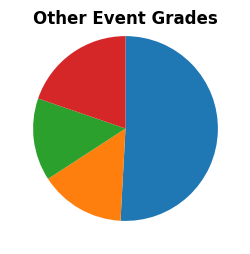

In [40]:
fig,ax = plt.subplots(1,1,figsize=(3, 3))
patches,texts = ax.pie(nums_other, startangle = 90, counterclock=False)
ax.set_title('Other Event Grades',fontweight='bold',y=0.92, fontsize=12)

In [41]:
nums_other

[3293, 969, 935, 1278, 0]

#### Repeating

Text(0.5, 0.92, 'Repeating Other Event Grades')

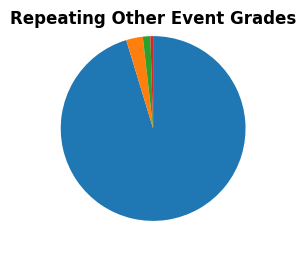

In [42]:
fig,ax = plt.subplots(1,1,figsize=(3, 3))
patches,texts = ax.pie(nums_other_rpt, startangle = 90, counterclock=False)
ax.set_title('Repeating Other Event Grades',fontweight='bold',y=0.92, fontsize=12)

In [43]:
nums_other_rpt

[1013, 31, 14, 5, 0]

#### Isolated

Text(0.5, 0.92, 'Isolated Other Event Grades')

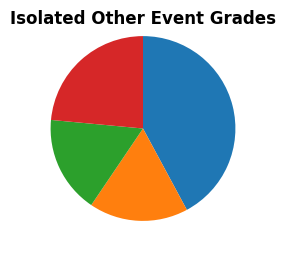

In [44]:
fig,ax = plt.subplots(1,1,figsize=(3, 3))
patches,texts = ax.pie(nums_other_isol, startangle = 90, counterclock=False)
ax.set_title('Isolated Other Event Grades',fontweight='bold',y=0.92, fontsize=12)

In [45]:
nums_other_isol

[2280, 938, 921, 1273, 0]

In [47]:
np.sum(nums_other_isol)

5412